In [30]:
from math import trunc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import trunc
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#from mpl_toolkits.basemap import Basemap
#from matplotlib.patches import Polygon

In [31]:
def drop_outliers(df):
    col_interest = 'Victims Injured'
    q1 = df[col_interest].quantile(0.25)
    q3 = df[col_interest].quantile(0.75)
    iqr = q3 - q1
    outliers_removed = df[(df[col_interest] >= (q1 - 1.5 * iqr)) & (df[col_interest] <= (q3 + 1.5 * iqr))]
def proccess_data():
    data_path = 'Data/MergedGunData.csv'
    assert isinstance(data_path,str)
    df = pd.read_csv(data_path)
    # Check for missing values
    missing_values = df.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df = df.dropna(subset=['Address'])
    #handle data parsing
    df['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df.sort_values(by='dates_proccessed')
    #Optional: write back proccessed data
    df.to_csv('ProcessedGunData.csv',index=False)

proccess_data()

Incident ID             0
Incident Date           0
State                   0
City Or County          0
Address                15
Victims Killed          0
Victims Injured         0
Suspects Killed         0
Suspects Injured        0
Suspects Arrested       0
Operations           4686
Year                 1668
dtype: int64


In [32]:

# Load the data
file_path = 'ProcessedGunData.csv'
assert isinstance(file_path,str)
df = pd.read_csv(file_path)
print(df.columns)


Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations', 'Year',
       'dates_proccessed'],
      dtype='object')


# Total Mass-Shooting Incidents and Deaths [2014-2023]

In [33]:

# Load the CSV file
data = pd.read_csv('ProcessedGunData.csv')
assert(len(data) > 0)
# Convert 'dates_proccessed' to datetime format and extract the year
data['Year'] = pd.to_datetime(data['dates_proccessed']).dt.year

# Aggregate totals for each year
yearly_victims_killed = data.groupby('Year')['Victims Killed'].sum().reset_index()
yearly_incidents = data.groupby('Year').size().reset_index(name='Incidents')

# Get values for 2018 and 2023
victims_killed_2018 = yearly_victims_killed.loc[yearly_victims_killed['Year'] == 2018, 'Victims Killed'].values[0]
victims_killed_2023 = yearly_victims_killed.loc[yearly_victims_killed['Year'] == 2023, 'Victims Killed'].values[0]
incidents_2018 = yearly_incidents.loc[yearly_incidents['Year'] == 2018, 'Incidents'].values[0]
incidents_2023 = yearly_incidents.loc[yearly_incidents['Year'] == 2023, 'Incidents'].values[0]

# Calculate percentage increases
percent_increase_victims = ((victims_killed_2023 - victims_killed_2018) / victims_killed_2018) * 100
percent_increase_incidents = ((incidents_2023 - incidents_2018) / incidents_2018) * 100

# Plot total victims killed per year
def plotvictims_killed_yr():
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(
        x=yearly_victims_killed['Year'], 
        y=yearly_victims_killed['Victims Killed'],
        mode='lines+markers+text',
        text=yearly_victims_killed['Victims Killed'],
        textposition='top center',
        textfont=dict(size=10),
        line=dict(width=3, color='#FF6B6B'),
        marker=dict(size=10, color='#FF6B6B')
    ))
    fig1.add_shape(
        type="line",
        x0=2018, y0=victims_killed_2018,
        x1=2023, y1=victims_killed_2018,
        line=dict(color="Gray", width=2, dash="dot")
    )
    fig1.add_annotation(
        x=2023, y=(victims_killed_2023 - 20) / 1,
        text=f'+{percent_increase_victims:.2f}% from 2018',
        showarrow=True,
        arrowhead=2,
        arrowsize=2,
        arrowwidth=2,
        arrowcolor='#333333',
        ax=0,
        ay=(victims_killed_2023 - victims_killed_2018) / 2,
        valign='middle'
    )
    fig1.update_layout(
        title='Total Mass-Shooting Deaths [2014-2023]',
        xaxis_title='Year',
        yaxis_title='Number of Victims Killed',
        font=dict(size=14),
        plot_bgcolor='rgba(240,240,240,0.8)',
        paper_bgcolor='white',
        hovermode='x unified',
        xaxis=dict(
            tickmode='linear',
            tick0=min(yearly_victims_killed['Year']),
            dtick=1,
            range=[min(yearly_victims_killed['Year'])-0.5, max(yearly_victims_killed['Year'])+0.5]
        )
    )
    fig1.show()

def plot_incidents_yr():
    # Plot total incidents per year
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(
        x=yearly_incidents['Year'], 
        y=yearly_incidents['Incidents'],
        mode='lines+markers+text',
        text=yearly_incidents['Incidents'],
        textposition='top center',
        textfont=dict(size=10),
        line=dict(width=3, color='#4ECDC4'),
        marker=dict(size=10, color='#4ECDC4')
    ))
    fig2.add_shape(
        type="line",
        x0=2018, y0=incidents_2018,
        x1=2023, y1=incidents_2018,
        line=dict(color="Gray", width=2, dash="dot")
    )
    fig2.add_annotation(
        x=2023, y=(incidents_2023 - 20) / 1,
        text=f'+{percent_increase_incidents:.2f}% from 2018',
        showarrow=True,
        arrowhead=2,
        arrowsize=2,
        arrowwidth=2,
        arrowcolor='#333333',
        ax=0,
        ay=(incidents_2023 - incidents_2018) / 2,
    )
    fig2.update_layout(
        title='Total Mass-Shooting Incidents [2014-2023]',
        xaxis_title='Year',
        yaxis_title='Number of Incidents',
        font=dict(size=14),
        plot_bgcolor='rgba(240,240,240,0.8)',
        paper_bgcolor='white',
        hovermode='x unified',
        xaxis=dict(
            tickmode='linear',
            tick0=min(yearly_incidents['Year']),
            dtick=1,
            range=[min(yearly_incidents['Year'])-0.5, max(yearly_incidents['Year'])+0.5]
    )
    )
    fig2.show()
plotvictims_killed_yr()
plot_incidents_yr()

# Normalised Fatality Index (NFI)

In [34]:
gun_data = data
''' 
In order to calculate the fatality index, we first need to calculate two metrics for each state:

1) Total incidents : Sum up the count of incidents by ID in each state.
2) Total victims killed : Sum up the victims killed for each incident in a state.

'''
gun_data['Victims Killed'] = pd.to_numeric(gun_data['Victims Killed'], errors='coerce')
fatality_index = gun_data.groupby('State').agg(
    total_incidents=('Incident ID', 'count'),
    total_victims_killed=('Victims Killed', 'sum')
)

''' 
Calculate Fatality Index for each state by the formula discussed in PPT.
'''
fatality_index['fatality_index'] = (fatality_index['total_victims_killed']**2) / (fatality_index['total_incidents'])

''' 
Other approaches that we tried but didn't give as insightful results as we wanted
'''
# fatality_index['fatality_index'] = (
#     fatality_index['total_victims_killed'] * 
#     np.log(fatality_index['total_victims_killed'] + 1) * np.log(fatality_index['total_incidents'] + 1) / 
#     np.sqrt(fatality_index['total_incidents'])
# )

# Normalize the fatality index
fatality_index['normalized_fatality_index'] = (
    fatality_index['fatality_index'] / fatality_index['fatality_index'].sum()
)
fatality_index = fatality_index.reset_index()


In [35]:
''' 
Since the Plotly Choropleth library requires US state abbreviations to plot the US Heatmap, we need to map each state's full name to its abbreviations.
'''
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'California': 'TX', 'Utah': 'UT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
assert isinstance(state_abbreviations,dict)
fatality_index['State Abbreviation'] = fatality_index['State'].map(state_abbreviations)


fig = px.choropleth(fatality_index,
                    locations='State Abbreviation',
                    locationmode='USA-states',
                    color='normalized_fatality_index',
                    scope='usa',
                    title='Fatality Index by State in US',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_geos(fitbounds='locations', visible=False)


fig.update_layout(
    title_text='Normalised Fatality Index by State in US',
    title_x=0.5,  
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        bgcolor='rgba(0,0,0,0)'
    ),
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title="NFI", x=1)
)

fig.show()

# Top-5 US States by NFI Index [2014-2023]

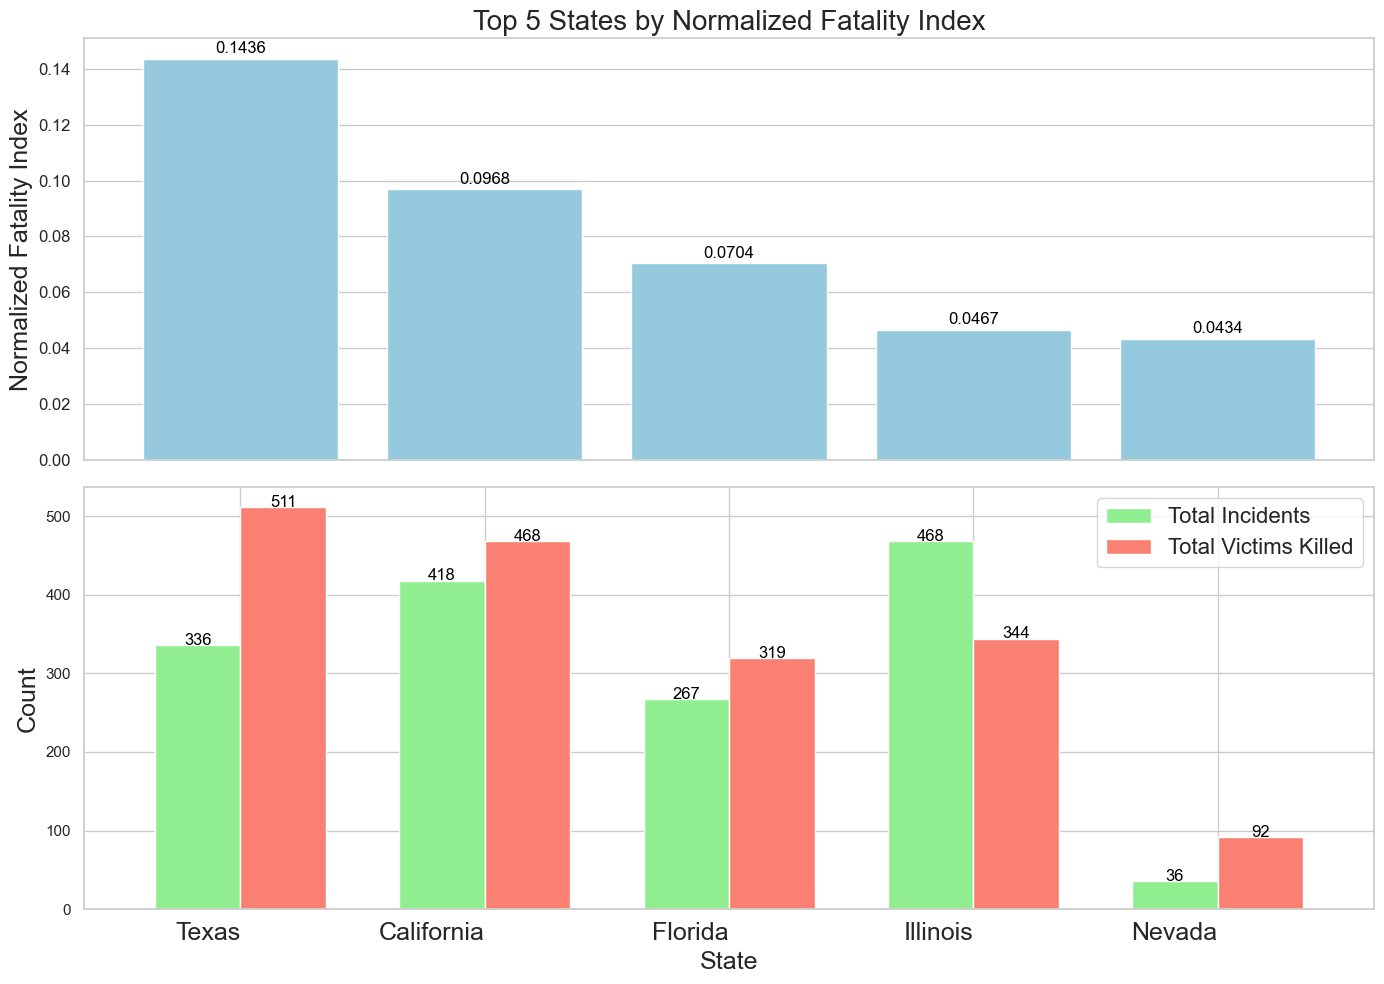

In [36]:
''' 
To find the top-5 states by NFI index, ve simply sort the NFI data by the value itself, and pick out the first 5 in descending order.
'''
top_5_states = fatality_index.sort_values('normalized_fatality_index', ascending=False).head(5)


sns.set(style='whitegrid', palette='muted')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

sns.barplot(x='State', y='normalized_fatality_index', data=top_5_states, ax=ax1, color='skyblue')
ax1.set_title('Top 5 States by Normalized Fatality Index', fontsize=20)
ax1.set_ylabel('Normalized Fatality Index', fontsize=18)
ax1.tick_params(axis='y', labelsize=12)

for i, v in enumerate(top_5_states['normalized_fatality_index']):
    ax1.text(i, v + 0.002, f'{v:.4f}', color='black', ha='center')

# Plot total incidents and total victims killed
width = 0.35
x = range(len(top_5_states))
ax2.bar([i - width/2 for i in x], top_5_states['total_incidents'], width, label='Total Incidents', color='lightgreen')
ax2.bar([i + width/2 for i in x], top_5_states['total_victims_killed'], width, label='Total Victims Killed', color='salmon')
ax2.set_xlabel('State', fontsize=18)
ax2.set_ylabel('Count', fontsize=18)
ax2.legend(loc='upper right', fontsize=16)

# Add data labels for total incidents and victims killed
for i in range(len(x)):
    ax2.text(i - width/2, top_5_states.iloc[i]['total_incidents'] + 0.5,
             str(top_5_states.iloc[i]['total_incidents']), color='black', ha='center')
    ax2.text(i + width/2, top_5_states.iloc[i]['total_victims_killed'] + 0.5,
             str(top_5_states.iloc[i]['total_victims_killed']), color='black', ha='center')

plt.xticks(x, top_5_states['State'], rotation=0, ha='right', fontsize=18)

plt.tight_layout()
plt.show()

# California Data

In [37]:
''' 
In order to fetch just California data, we simply fetch it by the "State" field in the gun_data dataframe.
'''
cali_data = gun_data[gun_data['State'] == 'California']

''' 
Group by city/county and sum the number of victims killed and injured
'''
cali_summary = cali_data.groupby('City Or County').agg(
    total_victims_killed=('Victims Killed', 'sum'),
    total_victims_injured=('Victims Injured', 'sum')
).reset_index()

'''Calculate total victims'''
cali_summary['total_victims'] = cali_summary['total_victims_killed'] + cali_summary['total_victims_injured']

'''Get the top 10 cities/counties with most victims injured + killed'''
top_10_cali = cali_summary.nlargest(10, 'total_victims')

# Sort the data by total victims
top_10_cali = top_10_cali.sort_values(by='total_victims', ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=top_10_cali['City Or County'],
    x=top_10_cali['total_victims_killed'],
    name='Victims Killed',
    orientation='h',
    marker_color='#FF6B6B'
))

fig.add_trace(go.Bar(
    y=top_10_cali['City Or County'],
    x=top_10_cali['total_victims_injured'],
    name='Victims Injured',
    orientation='h',
    marker_color='#4ECDC4'
))

fig.update_layout(
    title={
        'text': 'Top 10 California Cities/Counties by Gun Violence Victims',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Number of Victims',
    yaxis_title='City/County',
    barmode='stack',
    legend=dict(
        x=0.7,
        y=0.9,
        bgcolor='rgba(255, 255, 255, 0.5)'
    ),
    height=600,
    margin=dict(l=0, r=0, t=30, b=0)
)

fig.show()

## Police Action Analysis

In [38]:
#Load the data
file_path = 'ProcessedGunData.csv' 
df = pd.read_csv(file_path)

#Dictionary to map full state names to abbreviations
state_abbr = { 'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 
              'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 
              'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
              'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 
              'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 
              'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 
              'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
              'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 
              'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 
              'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC' }


abbrev_to_state = {v: k for k, v in state_abbr.items()}


In [39]:
def add_surrendered_captured_data(df,new_data_path):
    ''' 
    Polpulates the data with new columns - if suspect was surrendered or captured.
    '''
    assert isinstance(new_data_path,str)
    assert isinstance(df,pd.DataFrame)

    df_new = pd.read_csv(new_data_path)
    # Check for missing values
    missing_values = df_new.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df_new = df_new.dropna(subset=['Address'])
    #handle data parsing
    df_new['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df_new.sort_values(by='dates_proccessed')
    
    # Create a dictionary mapping 'Incident ID' to 'Suspect Arrested'
    id_to_arrested = dict(zip(df_new['Incident ID'], df_new['Suspects Arrested']))
    
    # Create the new 'Suspect Surrendered' column
    df['Suspect Surrendered'] = df['Incident ID'].map(id_to_arrested).fillna(0).astype(int)

    df['Suspect Captured'] = 0

    for index, row in df.iterrows():
        if(df.loc[index,'Suspects Arrested']>0 and df.loc[index,'Suspect Surrendered'] == 0):
            df.loc[index,'Suspect Captured'] = df.loc[index,'Suspects Arrested']
    
    return df

In [40]:
def add_suicide_kills_data(df,new_data_path):
    ''' 
    Polpulates the data with new columns - if suspect died by suicide or kill.
    '''
    assert isinstance(new_data_path,str)
    assert isinstance(df,pd.DataFrame)

    df_new = pd.read_csv(new_data_path)
    # Check for missing values
    missing_values = df_new.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df_new = df_new.dropna(subset=['Address'])
    #handle data parsing
    df_new['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df_new.sort_values(by='dates_proccessed')
    
        # Create a dictionary mapping 'Incident ID' to 'Suspect Arrested'
    id_to_killed = dict(zip(df_new['Incident ID'], df_new['Suspects Killed']))
    
    df['Suspects Suicide'] = df['Incident ID'].map(id_to_killed).fillna(0).astype(int)

    df['Suspects Killed by Cop'] = 0

    for index, row in df.iterrows():
        if(df.loc[index,'Suspects Killed']>0 and df.loc[index,'Suspects Suicide'] == 0):
            df.loc[index,'Suspects Killed by Cop'] = df.loc[index,'Suspects Killed']
            #print(df.loc[index,'Suspects Killed'])
    
    return df


In [41]:
df_added = add_surrendered_captured_data(df,'Data/mass_shooting_13_24_surrenders.csv')
df_added = add_suicide_kills_data(df_added,'Data/mass_shooting_13_24_suicides.csv')

Incident ID           0
Incident Date         0
State                 0
City Or County        0
Address               0
Victims Killed        0
Victims Injured       0
Suspects Killed       0
Suspects Injured      0
Suspects Arrested     0
Operations           20
dtype: int64
Incident ID            0
Incident Date          0
State                  0
City Or County         0
Address                0
Victims Killed         0
Victims Injured        0
Suspects Killed        0
Suspects Injured       0
Suspects Arrested      0
Operations           186
dtype: int64


In [42]:
df_added.to_csv('Data/added_suspect_data.csv')

### Police Action Index - PAI

$$
police\_action\_index 

$$

Suspect capture - police action rewarded - justice index high

Suspect kill - police action rewarded - justice index moderate - high

Suspect suicide - police action penalized based on victim count

Suspect surrender- police action penalized based on victim count

Suspect injured only (rare)

Suspect at large - police action heavily penalized based on victim count

In [43]:
def incident_per_state(df):
    ''' 
    Calculates number of incidents per state.
    '''
    assert isinstance(df,pd.DataFrame)

    incident_by_state={}

    for index, row in df.iterrows():
        if(df.loc[index,'State'] in incident_by_state):
            incident_by_state[df.loc[index,'State']] += 1
        else:
            incident_by_state[df.loc[index,'State']] = 1

    return incident_by_state



def incident_per_city(df):
    ''' 
    Calculated number of incidents per city.
    '''
    assert isinstance(df,pd.DataFrame)

    incident_by_city={}

    for index, row in df.iterrows():
        if(df.loc[index,'City Or County'] in incident_by_city):
            incident_by_city[df.loc[index,'City Or County']] += 1
        else:
            incident_by_city[df.loc[index,'City Or County']] = 1

    return incident_by_city


In [44]:
incident_by_state = incident_per_state(df_added)
incident_by_city = incident_per_city(df_added)

In [45]:
def add_police_action_index(df):
    ''' 
    Calculate & populate PAI.
    '''
    assert isinstance(df,pd.DataFrame)
    df['Police Action Index'] = 0.0
    
    for index, row in df.iterrows():
        kills=df.loc[index,'Suspects Killed']
        arrests=df.loc[index,'Suspects Arrested']
        total_suspects = kills + arrests + df.loc[index,'Suspects Injured']
        escaped=(kills==0 and arrests == 0)
        
        kill_suicide=df.loc[index,'Suspects Suicide']
        kill_cop=df.loc[index,'Suspects Killed by Cop']
        arrests_surrender=df.loc[index,'Suspect Surrendered']
        arrests_capture=df.loc[index,'Suspect Captured']

        victim_kill = df.loc[index,'Victims Killed']
        victim_injured = df.loc[index,'Victims Injured']

        police_action=0

        if(escaped and (victim_kill+victim_injured == 0)):
            police_action = 0
        elif(escaped and (victim_kill+victim_injured > 0)):
            police_action -= (victim_kill*0.2 + victim_injured*0.05)
        
        if(total_suspects!=0):
            police_action += ((arrests_capture * 1.0) + (arrests_surrender * 0.8) + (kill_cop * 0.6) + (kill_suicide * 0.3))    
                  
        if(not(escaped) and (victim_kill+victim_injured > 0)):
            police_action -= (victim_kill*0.2 + victim_injured*0.05)
        

        
        police_action_index = police_action 
        df.loc[index,'Police Action Index'] = police_action_index
    
    return df

def normalize_police_action_index(df):
    ''' 
    Normalze & populate PAI.
    '''
    assert isinstance(df,pd.DataFrame)
    total_pa = df['Police Action Index'].sum()

    df['Police Action Index Normalized'] = df['Police Action Index'] / total_pa

    return df

df_index_added = add_police_action_index(df_added)
df_index_added3 = normalize_police_action_index(df_index_added)

In [46]:
df_index_added3.to_csv('Data/added_police_5yr.csv')

## Plots for PAI Trends

Plotting spatial trends with respect to states & cities

Analyzing best & worst case states for $PAI$

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\2869118615.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




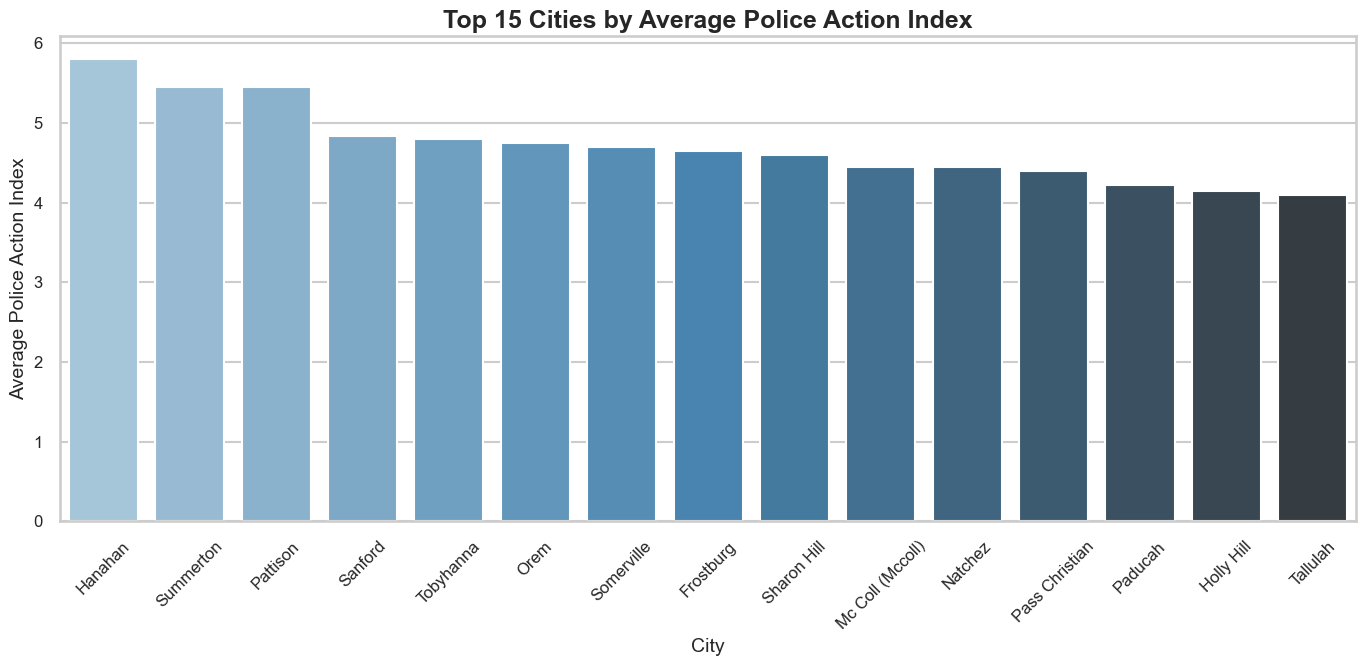

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\2869118615.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




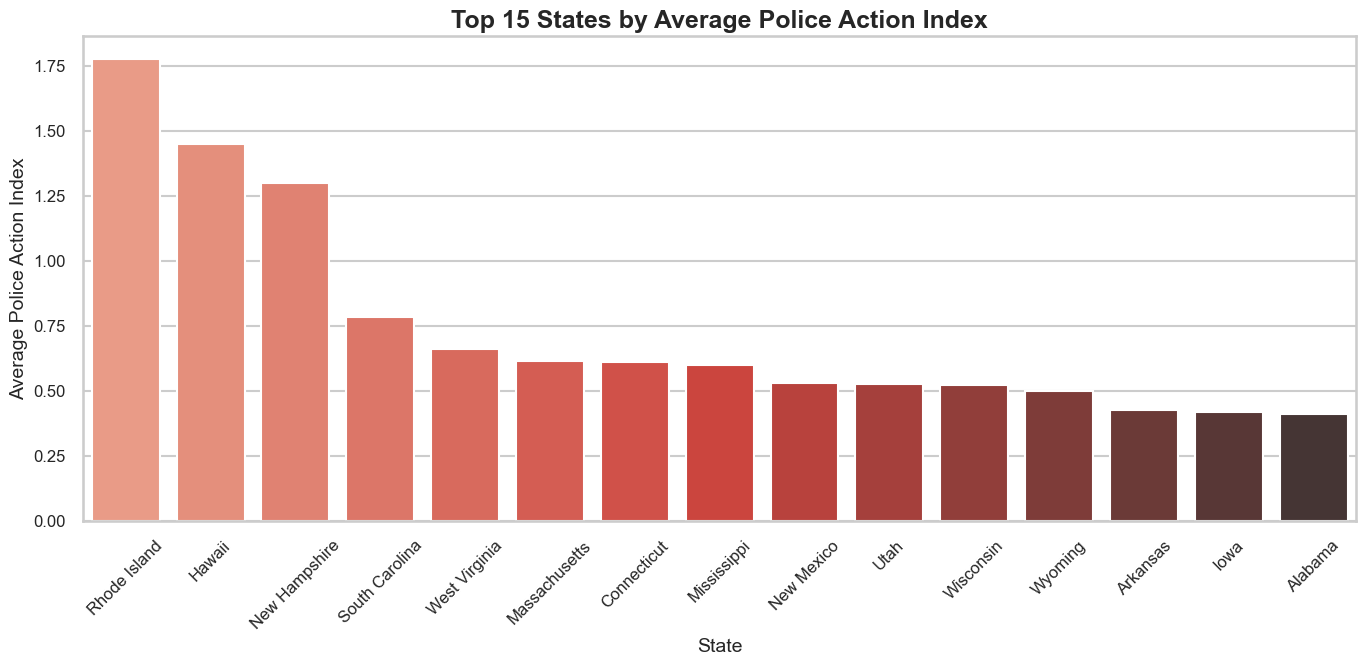

In [65]:

# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# index with number of incidents

city_police = df_index_added.groupby('City Or County')['Police Action Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_police.index, y=city_police.values, palette='Blues_d')
plt.title('Top 15 Cities by Average Police Action Index', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Police Action Index
state_police = df_index_added.groupby('State')['Police Action Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')
plt.title('Top 15 States by Average Police Action Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\2855163159.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




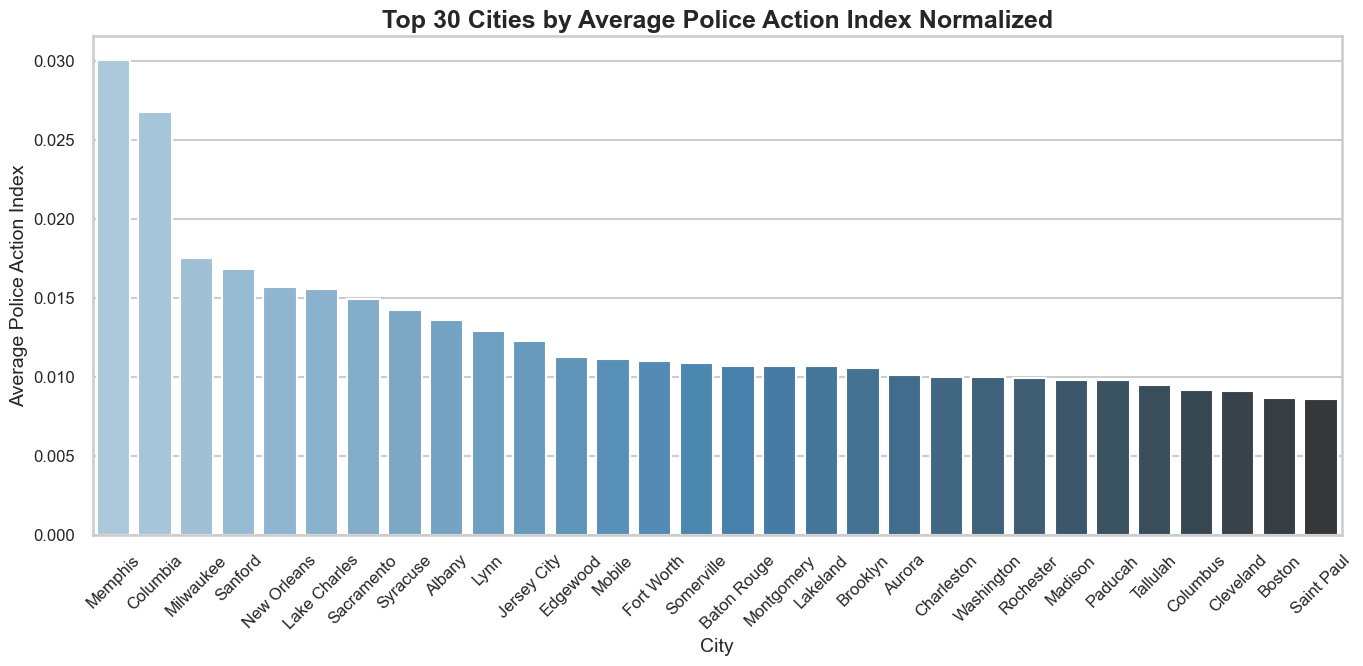

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\2855163159.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




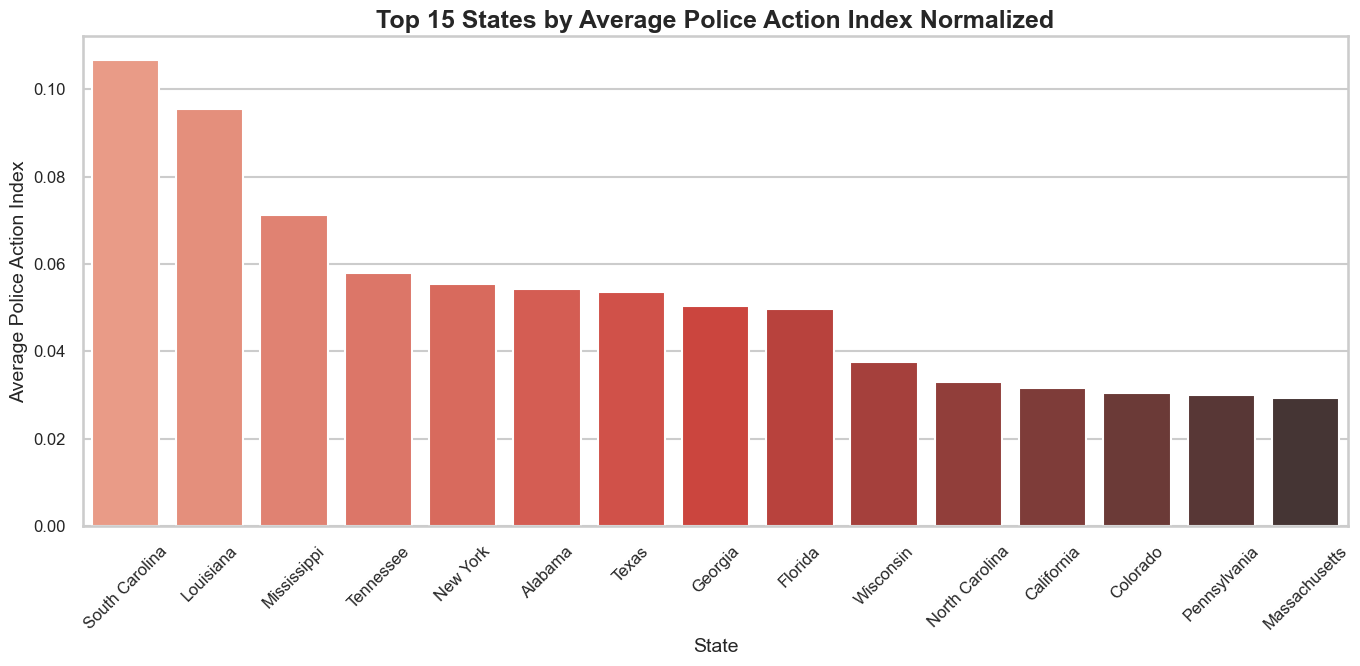

In [66]:
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# index with number of incidents

city_police = df_index_added3.groupby('City Or County')['Police Action Index Normalized'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_police.index, y=city_police.values, palette='Blues_d')
plt.title('Top 30 Cities by Average Police Action Index Normalized', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Normalized Police Action Index
state_police = df_index_added3.groupby('State')['Police Action Index Normalized'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')
plt.title('Top 15 States by Average Police Action Index Normalized', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\4253983500.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




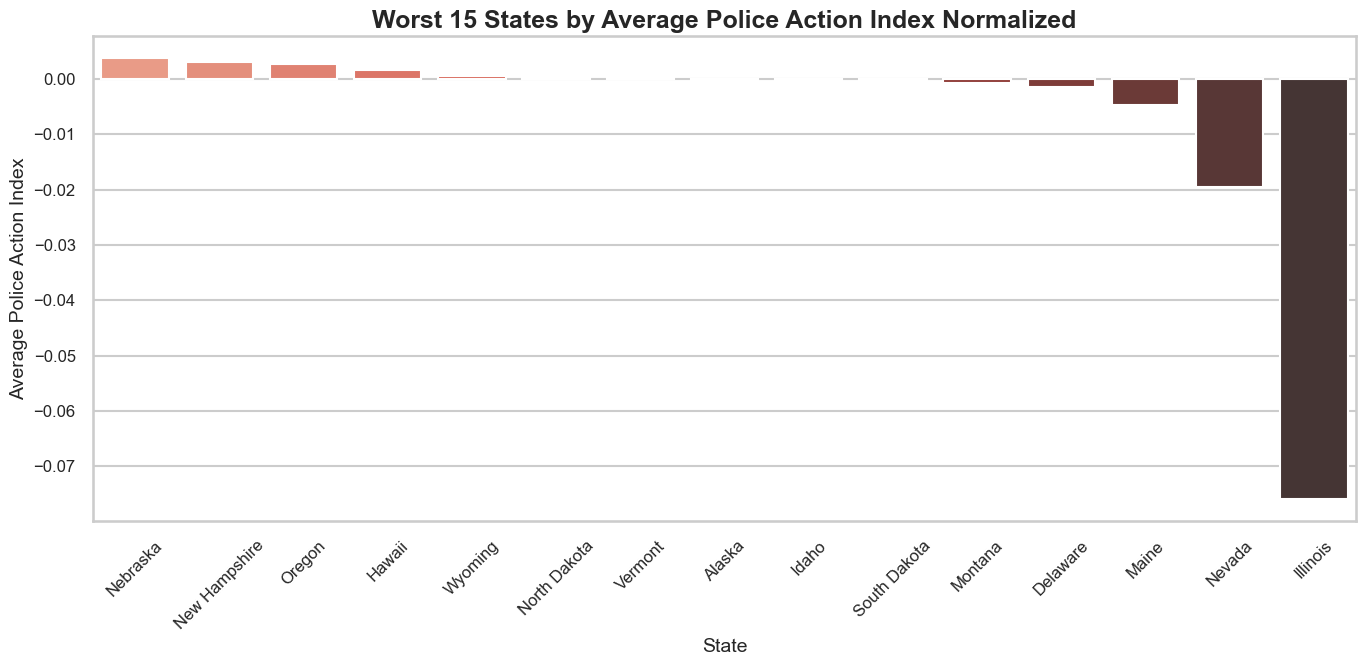

In [67]:
# Bottom 15 States by Police Action Index
state_police_worst = df_index_added3.groupby('State')['Police Action Index Normalized'].sum().sort_values(ascending=False).tail(15)


plt.figure(figsize=(14, 7))
sns.barplot(x=state_police_worst.index, y=state_police_worst.values, palette='Reds_d')
plt.title('Worst 15 States by Average Police Action Index Normalized', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\2133562442.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




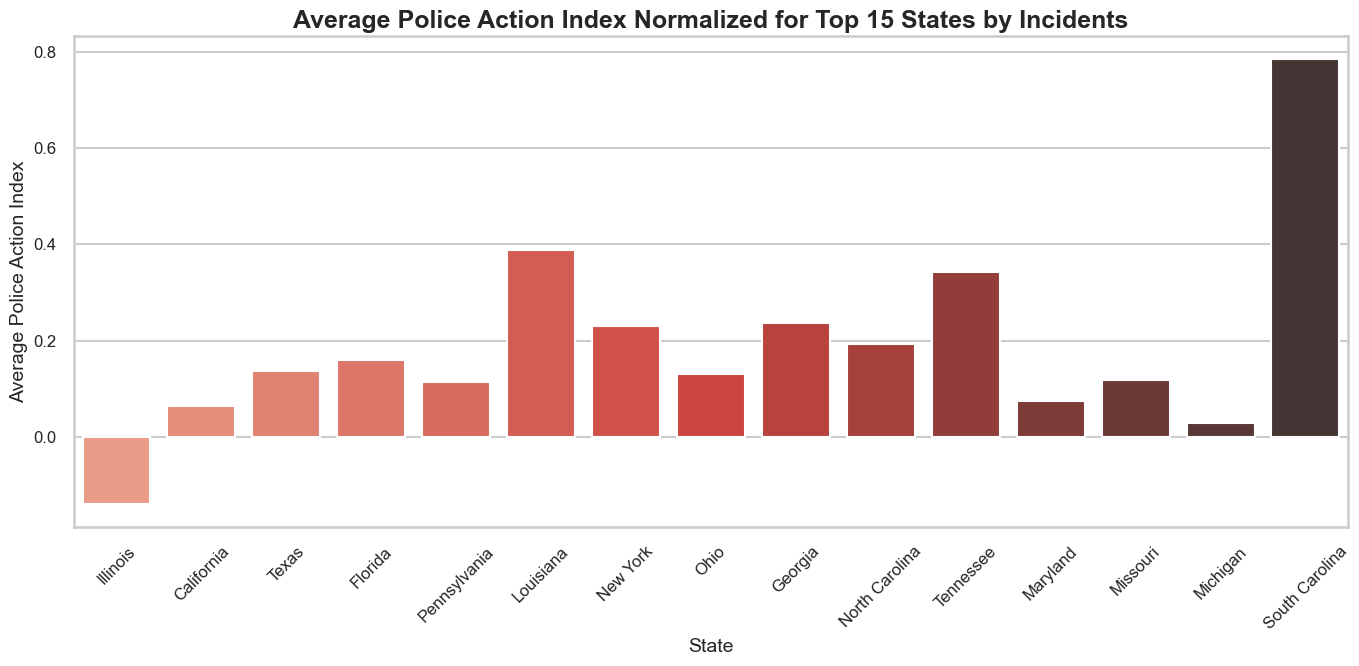

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\2133562442.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



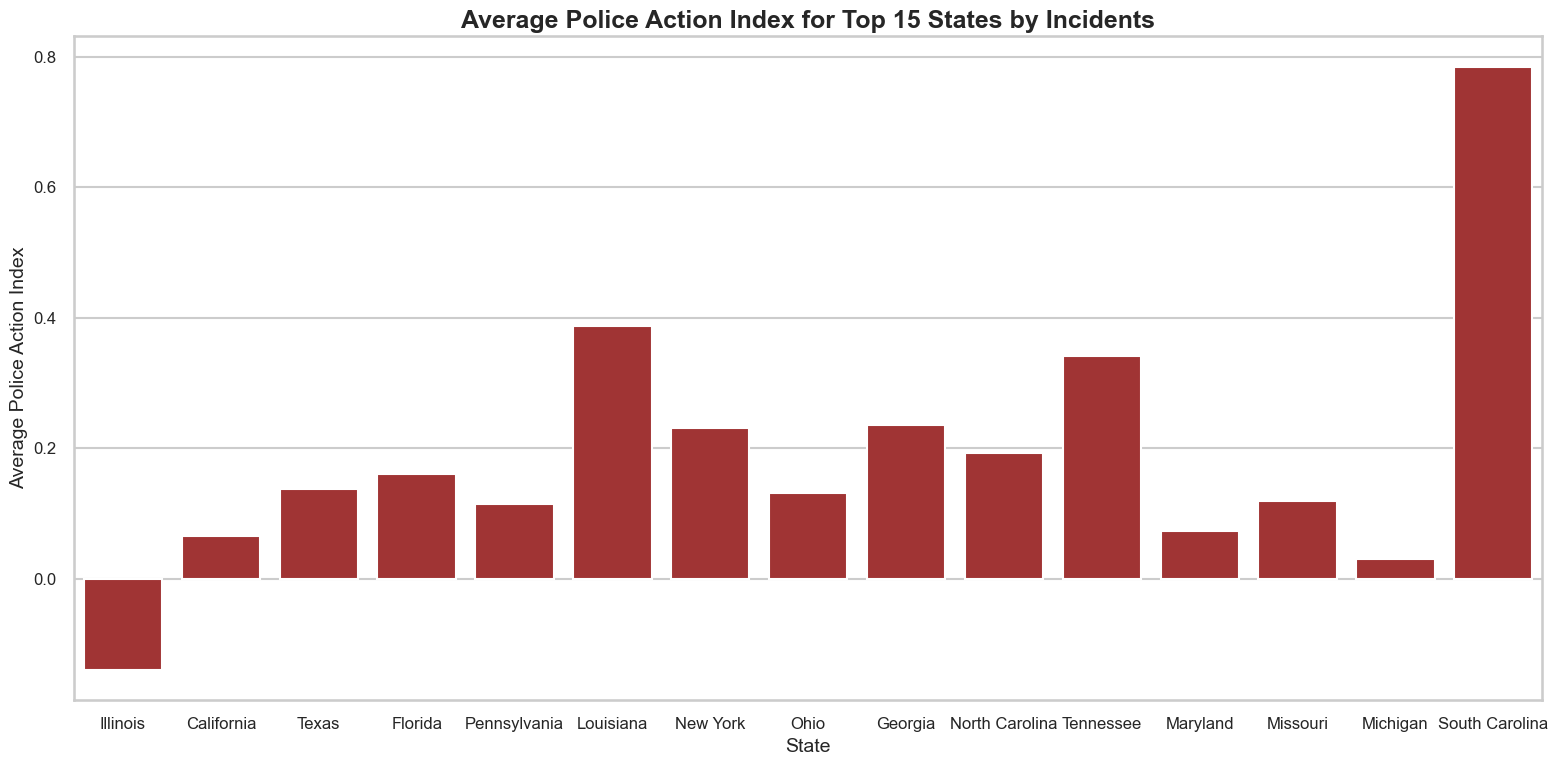

In [68]:
sorted_incident_state = dict(sorted(incident_by_state.items(), key=lambda item: item[1]))

police_action_by_state = df_index_added3.groupby('State')['Police Action Index'].mean()


sorted_states = sorted(sorted_incident_state.keys(), key=lambda x: sorted_incident_state[x], reverse=True)

top_15_states = sorted_states[:15]

top_15_police_action = police_action_by_state.loc[top_15_states]


plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, palette='Reds_d')
plt.title('Average Police Action Index Normalized for Top 15 States by Incidents', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, color='firebrick')
plt.title('Average Police Action Index for Top 15 States by Incidents', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
# Adjust x-axis labels to prevent overlap
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
plt.tight_layout()
plt.show()



C:\Users\devra\AppData\Local\Temp\ipykernel_8616\642315162.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




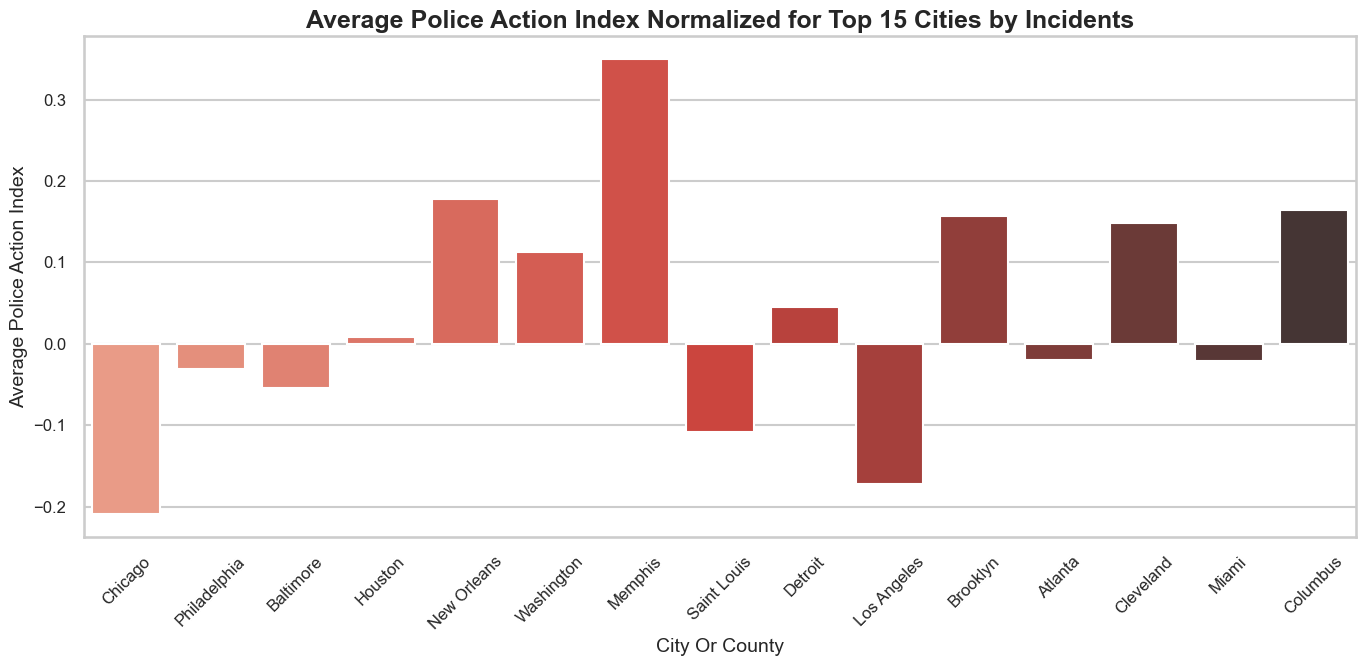

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\642315162.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



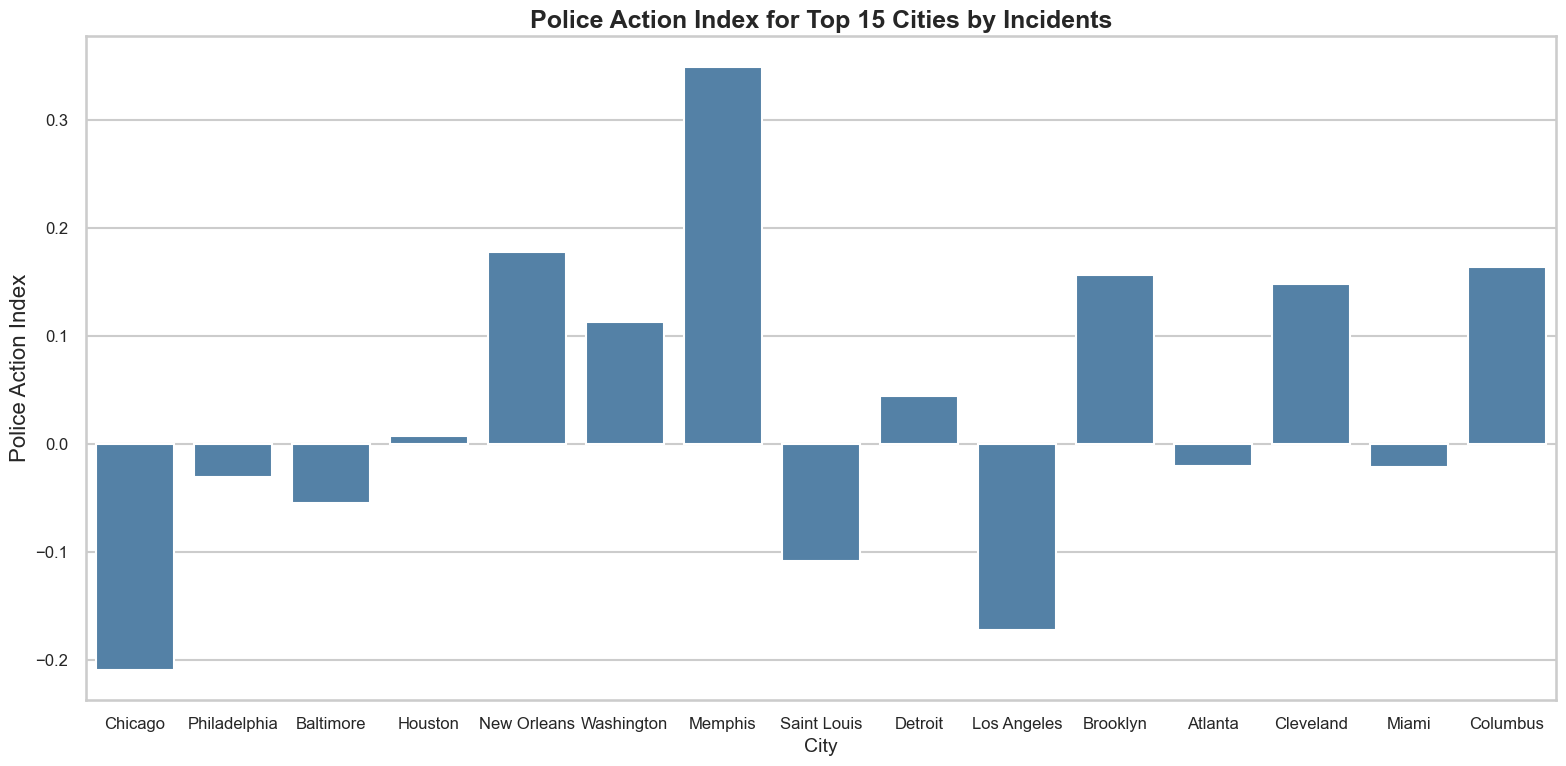

In [69]:
sorted_incident_city = dict(sorted(incident_by_city.items(), key=lambda item: item[1]))


police_action_by_city = df_index_added3.groupby('City Or County')['Police Action Index'].mean()


sorted_city = sorted(sorted_incident_city.keys(), key=lambda x: sorted_incident_city[x], reverse=True)

top_15_city = sorted_city[:15]

top_15_police_action = police_action_by_city.loc[top_15_city]

plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, palette='Reds_d')
plt.title('Average Police Action Index Normalized for Top 15 Cities by Incidents', fontsize=18, weight='bold')
plt.xlabel('City Or County', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, color='steelblue')
plt.title('Police Action Index for Top 15 Cities by Incidents', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Police Action Index', fontsize=16)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=0.2)
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
plt.tight_layout()
plt.show()

In [70]:
# Convert full state names to abbreviations
df_map = df_index_added.copy()

# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

df_map['State'] = df_map['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df_map.groupby('State').agg({'Police Action Index': 'mean'}).reset_index()

# Create choropleth map for victims killed
fig_killed = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Police Action Index',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Police Action Index': 'Police Action Index'},
    title='Mean Police Action Index by State'
)

# Show the maps
fig_killed.show()

In [71]:
# Resample the data to get monthly totals
# Convert 'Incident Date' to datetime format
df_map['Incident Date'] = pd.to_datetime(df_map['Incident Date'])

# Set the index to 'Incident Date'
df_map.set_index('Incident Date', inplace=True)

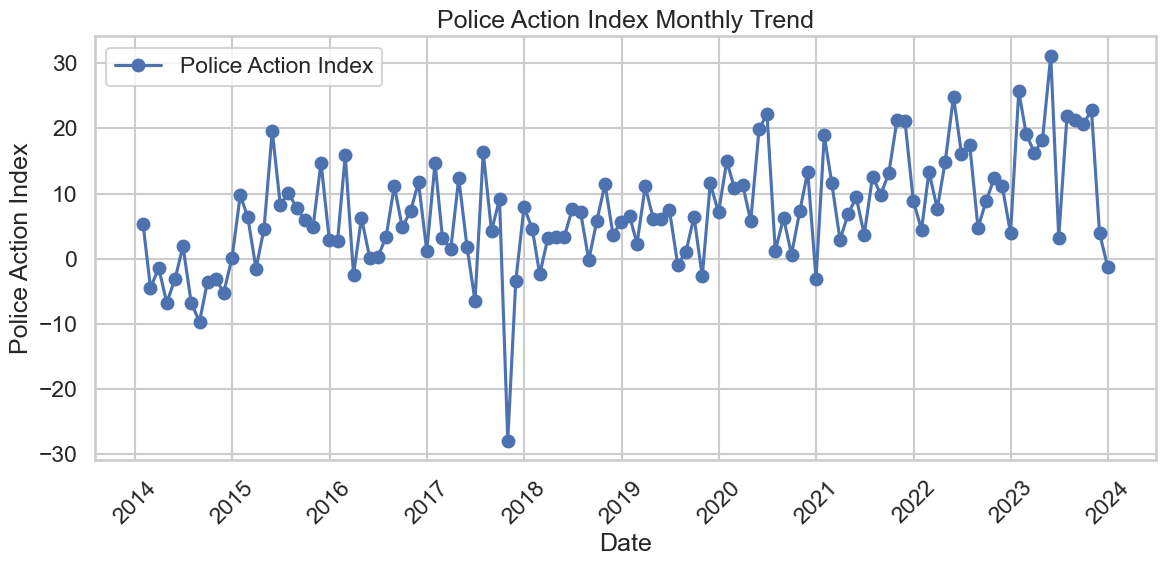

In [72]:
monthly_totals = df_map.resample('ME').agg({'Police Action Index': 'sum'})


# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(monthly_totals.index, monthly_totals['Police Action Index'], label='Police Action Index', marker='o')
plt.plot(monthly_totals.index, monthly_totals['Police Action Index'], label='Police Action Index', marker='o')
plt.title('Police Action Index Monthly Trend')
plt.xlabel('Date')
plt.ylabel('Police Action Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [73]:
# Load the CSV file
data = pd.read_csv('Data/added_police_and_justice_10.csv')

# Calculate average Police Action Index by state
average_pai = data.groupby('State')['Police Action Index'].sum().reset_index()

# Create a mapping of state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviations to the DataFrame
average_pai['Abbreviation'] = average_pai['State'].map(state_abbrev)

# Create the plot
fig = px.choropleth(
    average_pai,
    locations='Abbreviation',
    locationmode='USA-states',
    color='Police Action Index',
    color_continuous_scale=px.colors.sequential.thermal,
    labels={'Police Action Index': 'PAI'},
    scope='usa',
)

# Update layout
fig.update_layout(
    title={'text': 'Cumulative Police Action Index by State', 'x': 0.5},
    coloraxis_colorbar=dict(title='PAI', x=1.02),
    margin=dict(r=60)
)

# Show the figure
fig.show()

In [74]:
# Load the CSV file
data = pd.read_csv('Data/added_police_and_justice_10.csv')

# Calculate cumulative Police Action Index by state
cumulative_pai = data.groupby('State')['Police Action Index'].sum().reset_index()

# Identify the top 15 states by the number of incidents
top_states = data['State'].value_counts().nlargest(10).index.tolist()

# Filter data for top 15 states
filtered_data = cumulative_pai[cumulative_pai['State'].isin(top_states)]

# Create the plot
fig = px.bar(
    filtered_data.sort_values(by='Police Action Index', ascending=False),
    x='State',
    y='Police Action Index',
    title='Cumulative Police Action Index of Top 15 States by Incidents',
    labels={'Police Action Index': 'Cumulative PAI'},
    color='Police Action Index',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout for aesthetics
fig.update_layout(
    title={'text': 'Cumulative Police Action Index of Top 15 States by Incidents', 'x': 0.5},
    xaxis_title='State (Top 15 by Incidents)',
    yaxis_title='Cumulative PAI',
    coloraxis_colorbar=dict(title='PAI', x=1.02),
    margin=dict(r=60)
)

# Show the figure
fig.show()

Analyzing PAI for Illinois since it is against the trend-

In [75]:

# Load the CSV file
data = pd.read_csv('Data/added_police_and_justice_10.csv')

# Convert 'Incident Date' to datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter data for Illinois
illinois_data = data[data['State'] == 'Illinois']

# Extract year from Incident Date
illinois_data['Year'] = illinois_data['Incident Date'].dt.year

# Calculate cumulative Police Action Index and incidents per year
cumulative_pai = illinois_data.groupby('Year')['Police Action Index'].sum().reset_index()
incident_counts = illinois_data.groupby('Year').size().reset_index(name='Incident Count')

# Merge the two DataFrames on year
plot_data = pd.merge(cumulative_pai, incident_counts, on='Year')

# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for incident counts
fig.add_trace(
    go.Bar(x=plot_data['Year'], y=plot_data['Incident Count'], name='Incident Count'),
    secondary_y=False,
)

# Add line chart for cumulative PAI
fig.add_trace(
    go.Scatter(
        x=plot_data['Year'], 
        y=plot_data['Police Action Index'], 
        mode='lines+markers+text',
        name='Cumulative PAI',
        text=plot_data['Police Action Index'].round(2),
        textposition='top center',
        line=dict(color='red', width=3)
    ),
    secondary_y=True,
)

# Update layout
fig.update_layout(
    title='Cumulative Police Action Index and Incidents Count in Illinois (2014-2023)',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        tick0=2014,
        dtick=1,
        range=[2013.5, 2023.5]
    ),
    legend=dict(x=0.35, y=0.99, bgcolor='rgba(255, 255, 255, 0.8)'),
    hovermode='x unified'
)

# Set y-axes titles
fig.update_yaxes(title_text="Incident Count", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Police Action Index", secondary_y=True)

# Show the figure
fig.show()

C:\Users\devra\AppData\Local\Temp\ipykernel_8616\2538469054.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Interactive Dashboard -- State-wise visualization

In this analysis section, we virtualized the state-wise data by an interactive dashboard.

In [77]:
from dash import dcc, html
from dash.dependencies import Input, Output
from dash import Dash


In [59]:
# Part1: Load and process the data from processed gun data 

def load_and_preprocess_data(file_path):
    """
    Load and preprocess the gun violence dataset.

    Parameters:
        file_path (str): Path to the CSV file containing the gun violence data.

    Returns:
        pd.DataFrame: Preprocessed DataFrame with 'Incident Date' as datetime and 'Year' extracted.
    """
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Convert 'Incident Date' to datetime
    data['Incident Date'] = pd.to_datetime(data['Incident Date'], errors='coerce')
    
    # Extract the year from the 'Incident Date'
    data['Year'] = data['Incident Date'].dt.year
    
    return data

In [60]:
# Part2:
# Define the layout of the Dashboard. It structures the dashboard's interface: 
# a dropdown for state selection and placeholders for statistic about each 
# state and bar plots visualizing incidents by year, day of the week, and month.

def create_app_layout(states):
    """
    Create the layout for the Dash application.

    Parameters:
        states (list): List of state names for the dropdown menu.

    Returns:
        html.Div: Dash application layout.
    """
    return html.Div([
        html.Div([
            # Dropdown for selecting a state
            dcc.Dropdown(
                id='state-dropdown',
                options=[{'label': state, 'value': state} for state in states],
                value=states[0],  # Default to the first state in the list
            ),
            html.Div(id='selected-state-output')
        ]),
        html.Div(id='state-statistics', style={'marginTop': '20px'}),
        html.Div([
            dcc.Graph(id='bar-plot-by-year'),
            dcc.Graph(id='bar-plot-by-week'),
            dcc.Graph(id='bar-plot-by-month')
        ])
    ])

In [61]:
# Part3:
# Dynamically when a user selects a state from the dropdown and use *Plotly* to
# generate figures for yearly, weekly, and monthly incidents based on the 
# selected state. 


def register_callbacks(app, data):
    """
    Register callbacks for the Dash app to update plots and statistics based on selected state.

    Parameters:
        app (dash.Dash): Dash application instance.
        data (pd.DataFrame): Gun violence dataset.
    """
    @app.callback(
        [Output("bar-plot-by-year", 'figure'),
         Output('bar-plot-by-week', 'figure'),
         Output('bar-plot-by-month', 'figure'),
         Output('state-statistics', 'children')],
        [Input('state-dropdown', 'value')]
    )
    def update_plots_and_stats(selected_state):
        """
        Update bar plots and statistics based on the selected state.

        Parameters:
            selected_state (str): State selected from the dropdown menu.

        Returns:
            tuple: Updated figures for year, week, month plots, and state-level statistics.
        """
        # Filter the data based on the selected state
        state_data = data[data['State'] == selected_state]

        # Yearly incidents
        yearly_incidents = state_data['Year'].value_counts().reset_index()
        yearly_incidents.columns = ['Year', 'Incidents']
        yearly_incidents = yearly_incidents.sort_values('Year')
        year_fig = px.bar(yearly_incidents, x='Year', y='Incidents', title=f'Gun Violence Incidents by Year in {selected_state}')

        # Weekly incidents
        incidents_by_day = state_data['Incident Date'].dt.day_name().value_counts().sort_index().reset_index()
        incidents_by_day.columns = ['Day of Week', 'Number of Incidents']
        week_fig = px.bar(incidents_by_day, x='Day of Week', y='Number of Incidents', title=f'Gun Violence Incidents by Day of Week in {selected_state}')

        # Monthly incidents
        incidents_by_month = state_data['Incident Date'].dt.month_name().value_counts().sort_index().reset_index()
        incidents_by_month.columns = ['Month', 'Number of Incidents']
        month_fig = px.bar(incidents_by_month, x='Month', y='Number of Incidents', title=f'Gun Violence Incidents by Month in {selected_state}')

        # State-level statistics
        total_accidents = len(state_data)
        total_deaths = state_data['Victims Killed'].sum()
        total_victims = state_data[['Victims Killed', 'Victims Injured']].sum().sum()

        state_stats = html.Div([
            html.P(f"Total Accidents: {total_accidents}"),
            html.P(f"Total Deaths: {total_deaths}"),
            html.P(f"Total Victims: {total_victims}")
        ])

        return year_fig, week_fig, month_fig, state_stats

In [62]:
# Part4:
# This is the main driver script for running the interactive dashboard. It can:
# - Initialize the Dash app.
# - Load and preprocesses data using data_processing.py.
# - Set the app layout using layout.py.
# - Register callbacks using callback.py.
# - Run the app server.

# Initialize the Dash app
app = Dash(__name__)

# Load and preprocess the data
file_path = 'ProcessedGunData.csv'  # Replace with the actual path
data = load_and_preprocess_data(file_path)

# Set up the app layout
app.layout = create_app_layout(data['State'].unique())

# Register callbacks
register_callbacks(app, data)

# Run the app
if __name__ == '__main__':
    """
    Run the Dash app server in debug mode.

    Usage:
        Execute this script to launch the Dash app. Ensure the dataset file is 
        accessible at the specified file path.
    """
    app.run_server(debug=True)

In [78]:
import folium
import json

In [79]:
# Step 1: Load the dataset with input validation
import os

# Define the input path
input_path = './Data/All_Year_Sorted_Data.csv'

# Validate the file path
assert os.path.exists(input_path), f"Error: The file path '{input_path}' does not exist."
assert os.path.isfile(input_path), f"Error: The path '{input_path}' is not a file."
assert input_path.lower().endswith('.csv'), f"Error: The file '{input_path}' is not a CSV file. Please provide a valid CSV file."

# Load the dataset
gun_data = pd.read_csv(input_path)

In [80]:
""" 
Step 2: Preprocess data

Create the 'Total_Victims' column, which aggregates the total number of victims 
(killed + injured).
"""
"""
This script preprocesses a gun violence dataset contained in a pandas DataFrame named 'gun_data'.

It assumes the following columns exist:
- 'Victims Killed': int or float, representing the number of victims killed in the incident.
- 'Victims Injured': int or float, representing the number of victims injured in the incident.
- 'Suspects Arrested': int or float, representing the number of suspects arrested by law enforcement.

The preprocessing steps include:
1. Creating a 'Total_Victims' column as the sum of killed and injured victims.
2. Creating a 'Severity_Ratio' column as the ratio of victims killed to victims injured.
   - Handling division-by-zero and infinite values by replacing them with 0.
3. Creating a 'Law_Enforcement_Response' column as the ratio of suspects arrested to total victims.
   - Similarly handling division-by-zero and infinite values by replacing them with 0.
"""


gun_data['Total_Victims'] = gun_data['Victims Killed'] + gun_data['Victims Injured']

"""
Compute the 'Severity_Ratio' as (Victims Killed) / (Victims Injured).
If there are no injured victims (division by zero), the ratio will result in infinity.
These infinite values are replaced with NaN and then filled with 0.
"""
gun_data['Severity_Ratio'] = gun_data['Victims Killed'] / gun_data['Victims Injured']
gun_data['Severity_Ratio'] = gun_data['Severity_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

"""
Compute the 'Law_Enforcement_Response' as (Suspects Arrested) / (Total_Victims).
Similarly, handle any infinite values by replacing them with NaN and filling them with 0.
"""
gun_data['Law_Enforcement_Response'] = gun_data['Suspects Arrested'] / gun_data['Total_Victims']
gun_data['Law_Enforcement_Response'] = gun_data['Law_Enforcement_Response'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [ ]:

"""
Step 3: Load real population data

In this section, we create a dictionary containing the population of various U.S. states 
and the District of Columbia. The data is then transformed into a pandas DataFrame for 
easier manipulation and integration with other datasets.

The dictionary keys are state names (str), and the values are population estimates (int).
This DataFrame will be useful for tasks such as normalization or calculation of per-capita 
metrics related to gun violence.
"""

# Dictionary containing state populations:
# Key: State name (string)
# Value: Population count (integer)
state_population_data = {
    "California": 39538223, "Texas": 29145505, "Florida": 21538187, "New York": 20201249,
    "Pennsylvania": 13002700, "Illinois": 12812508, "Ohio": 11799448, "Georgia": 10711908,
    "North Carolina": 10439388, "Michigan": 10077331, "New Jersey": 9288994, "Virginia": 8631393,
    "Washington": 7705281, "Arizona": 7151502, "Massachusetts": 7029917, "Tennessee": 6910840,
    "Indiana": 6785528, "Missouri": 6154913, "Maryland": 6177224, "Wisconsin": 5893718,
    "Colorado": 5773714, "Minnesota": 5706494, "South Carolina": 5118425, "Alabama": 5024279,
    "Louisiana": 4657757, "Kentucky": 4505836, "Oregon": 4237256, "Oklahoma": 3963516,
    "Connecticut": 3605944, "Utah": 3271616, "Iowa": 3190369, "Nevada": 3104614,
    "Arkansas": 3011524, "Mississippi": 2961279, "Kansas": 2937880, "New Mexico": 2117522,
    "Nebraska": 1961504, "Idaho": 1839106, "West Virginia": 1793716, "Hawaii": 1455271,
    "New Hampshire": 1377529, "Maine": 1362359, "Montana": 1084225, "Rhode Island": 1097379,
    "Delaware": 989948, "South Dakota": 886667, "North Dakota": 779094, "Alaska": 733391,
    "Vermont": 643077, "Wyoming": 576851, "District of Columbia": 689545
}

# Convert the dictionary into a pandas DataFrame for easier data manipulation
state_population_df = pd.DataFrame(list(state_population_data.items()), columns=["State", "Population"])


In [82]:

"""
Step 4: Load GeoJSON for US states with input validation

In this section, we load a GeoJSON file representing the boundaries of U.S. states. 
Before loading, we perform several validation checks to ensure that the file exists, 
is indeed a file (not a directory), and has the correct '.geojson' extension.

The resulting data (us_states) will be a Python dictionary containing the GeoJSON structure, 
which can be used for geospatial analyses or creating maps.
"""

# Define the GeoJSON file path
geojson_path = './Data/us-states.geojson'

# Validate that the file exists
assert os.path.exists(geojson_path), f"Error: The file path '{geojson_path}' does not exist."

# Validate that the path points to a file, not a directory
assert os.path.isfile(geojson_path), f"Error: The path '{geojson_path}' is not a file."

# Validate that the file has a .geojson extension
assert geojson_path.lower().endswith('.geojson'), f"Error: The file '{geojson_path}' is not a GeoJSON file. Please provide a valid GeoJSON file."

# Load the GeoJSON data into a Python dictionary
with open(geojson_path, 'r') as geojson_file:
    us_states = json.load(geojson_file)


In [83]:

"""
Step 5: Initialize a combined map

Here, we create a Folium map object centered on a specified latitude and longitude 
(in this case, roughly the geographical center of the contiguous United States). 
The map is initialized with a chosen zoom level, and will serve as the base layer 
onto which we can overlay geographical data, state boundaries, and various data-driven 
layers such as per-capita incident rates or other visualizations.

- 'location' parameter sets the initial center of the map.
- 'zoom_start' sets the initial zoom level (4 is typically a continental view for the US).
"""

# Create the base map centered around the United States
combined_map = folium.Map(location=[37.8, -96], zoom_start=4)


In [84]:
# Step 6: Process overall state-level data (no year differentiation)
# Aggregate state-level data
"""
# Step 6: Process overall state-level data (no year differentiation)

## Functionality
This code processes aggregated state-level data and adds multiple visualization layers (Choropleth Layers) to the map. Each layer visualizes specific metrics related to gun violence across U.S. states, such as incidents per million population, severity ratio, and law enforcement response ratio.

### Core Steps
1. **Data Aggregation:**
   - Group the data by state and compute the following metrics:
     - **total_incidents**: Total number of incidents for each state.
     - **Incidents_per_Million**: Normalized incidents per million population for each state.
     - **Avg_Severity_Ratio**: Average severity ratio for each state.
     - **Avg_Response_Ratio**: Average law enforcement response ratio for each state.

2. **Creating Map Layers:**
   - **Incidents per Million Layer:**
     - Uses a yellow-to-red-to-black gradient to visualize incidents per million population.
   - **Severity Ratio Layer:**
     - Uses the same yellow-to-red-to-black gradient to display the severity ratio.
   - **Response Ratio Layer:**
     - Uses a red-to-yellow-to-green gradient to show law enforcement response ratios, where red indicates a low response.

3. **Adding Interactivity:**
   - Implements JavaScript-based "Select All" and "Deselect All" buttons.
   - These buttons allow users to toggle all map layers for better usability.

### Parameters
- **geo_data:** GeoJSON file (`us_states`) containing geographical boundaries of U.S. states.
- **data:** Aggregated state-level data (`state_trends` and `state_ratios`) used to generate map layers.
- **columns:** Specifies columns used for mapping the choropleth layers.
- **fill_color:** Color gradients used for visualization:
  - `"YlOrRd"`: Yellow-to-red-to-black for `Incidents per Million` and `Severity Ratio`.
  - `"RdYlGn"`: Red-to-yellow-to-green for `Response Ratio`.
- **bins:** Thresholds for categorizing data into different ranges for better visualization.
- **legend_name:** Label for the legend of each map layer.
- **nan_fill_color:** Color used for states with missing data (white).
- **fill_opacity:** Opacity level for the filled regions.
- **line_opacity:** Opacity level for state boundary lines.

### Outputs
- Three choropleth layers are added to the map (`combined_map`):
  1. Incidents per Million.
  2. Severity Ratio.
  3. Response Ratio.
- Interactive JavaScript buttons are added for toggling the visibility of all layers.

### Dependencies
- Required Libraries: `pandas`, `folium`
- Input Files: 
  - `us_states` (GeoJSON file for U.S. state boundaries).
  - `gun_data` (CSV file with processed gun violence data).

### Notes
- Ensure all required data files are properly loaded before running this code.
- The `bins` parameter ensures clear categorization of the data into ranges for better visual clarity.
"""


state_trends = gun_data.groupby('State').agg(
    total_incidents=('Incident ID', 'count')
).reset_index()

state_trends = state_trends.merge(state_population_df, on="State", how="left")
state_trends['Incidents_per_Million'] = (state_trends['total_incidents'] / state_trends['Population']) * 1e6

state_ratios = gun_data.groupby('State').agg(
    Avg_Severity_Ratio=('Severity_Ratio', 'mean'),
    Avg_Response_Ratio=('Law_Enforcement_Response', 'mean')
).reset_index()

state_ratios = state_ratios.merge(
    state_trends[['State', 'Incidents_per_Million']],
    on="State",
    how="left"
)

# Add Incidents per Million Layer with yellow to red to black gradient
bins = list(state_trends['Incidents_per_Million'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
folium.Choropleth(
    geo_data=us_states,
    name=f"Incidents per Million",
    data=state_trends,
    columns=["State", "Incidents_per_Million"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",  # Changed to 'YlOrRd' for yellow to red to black gradient
    nan_fill_color="white",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="Incidents per Million",
    bins=bins
).add_to(combined_map)

# Add Severity Ratio Layer with yellow to red to black gradient
bins = list(state_ratios['Avg_Severity_Ratio'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
folium.Choropleth(
    geo_data=us_states,
    name=f"Severity Ratio",
    data=state_ratios,
    columns=["State", "Avg_Severity_Ratio"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",  # Changed to 'YlOrRd' for yellow to red to black gradient
    nan_fill_color="white",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="Severity Ratio",
    bins=bins
).add_to(combined_map)

# Add Response Ratio Layer with red to yellow to green gradient (Red = Low response)
# First, calculate the bins
bins = list(state_ratios['Avg_Response_Ratio'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))

# Ensure bins are in increasing order
bins = sorted(bins)

# Now add the choropleth layer with the correct bins
folium.Choropleth(
    geo_data=us_states,
    name=f"Response Ratio",
    data=state_ratios,
    columns=["State", "Avg_Response_Ratio"],
    key_on="feature.properties.name",
    fill_color="RdYlGn",  # Red to Yellow to Green gradient (Red = Low response)
    nan_fill_color="white",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="Response Ratio (Low = Red)",
    bins=bins  # Pass bins in increasing order
).add_to(combined_map)


# Add JavaScript for "Select All" and "Deselect All"
select_all_script = """
<script>
    function toggleLayers(action) {
        const checkboxes = document.querySelectorAll('.leaflet-control-layers-selector');
        checkboxes.forEach(checkbox => {
            if (checkbox.checked !== (action === 'select')) {
                checkbox.click();
            }
        });
    }
</script>
<div style="position: fixed; top: 10px; left: 10px; z-index: 9999;">
    <button onclick="toggleLayers('select')">Select All</button>
    <button onclick="toggleLayers('deselect')">Deselect All</button>
</div>
"""

In [85]:

"""
Step 7: Add Layer Control

In this step, we add a layer control widget to the Folium map. This widget allows 
viewers to toggle various map overlays on and off. We then inject a custom script 
for "Select All" and "Deselect All" functionalities, enhancing user interactivity.

Finally, we save the map to an HTML file. The printed message confirms that the 
map has been successfully created with the specified improvements.
"""

# Add a layer control to allow toggling between different layers
folium.LayerControl().add_to(combined_map)

# Inject the custom script and save the map
combined_map.get_root().html.add_child(folium.Element(select_all_script))
combined_map.save('2All_year_data_Combined_Gun_Violence_Map_With_YellowToRed_Gradient.html')
print("Map created with improved colors (Yellow to Red to Black gradient) and Select All/Deselect All buttons.")


Map created with improved colors (Yellow to Red to Black gradient) and Select All/Deselect All buttons.
